# 2021-02-16

I want to get some kind of handle on the hierarchical organization of fly Hi-C data. It seems obvious from looking at the data that there are levels of organization over the short-range boundaries. One of these is A/B compartments, but there's stuff beyond that too. I would like to 1) find a principled way to think about or identify these levels of organization, 2) potentially understand something about their nature, and 3) Compare them between species.

In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import gzip
import re
import os
import pandas as pd
from scipy.ndimage import gaussian_filter
from subprocess import check_call
from pomegranate import *

# Import my packages. The order of loading is important to avoid issues on my machine.
%matplotlib inline
import matplotlib as mpl
%matplotlib notebook
%matplotlib notebook

import sys
from importlib import reload
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/insulators/bin')
from hic_jupyter import viewer
import hic_jupyter as hc

In [2]:
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-53-54-x'
tracks_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced'
saves_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/saves/hic-53-54-x'

In [19]:
# Smooth tracks
def smooth_track_file(infile, outfile, sigma):
    data = hc.load_track_data(infile)
    for chr_ in data:
        data[chr_] = gaussian_filter(data[chr_], sigma=sigma)

    hc.write_track_data(data, outfile)

In [41]:
infile = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced/H3K18ac-c14c_dm6.txt.gz'
outfile = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced/H3K18ac-c14c_dm6_smooth5.txt'
sigma=5
smooth_track_file(infile, outfile, sigma)


In [34]:
infile = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced/S5_DNase_rep1.txt.gz'
for s in range(4,10,2):
    outfile = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced/S5_DNase_rep1_smooth' + str(s) + '.txt'

    smooth_track_file(infile, outfile, sigma=s)

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('X', '3L…

<IPython.core.display.Javascript object>


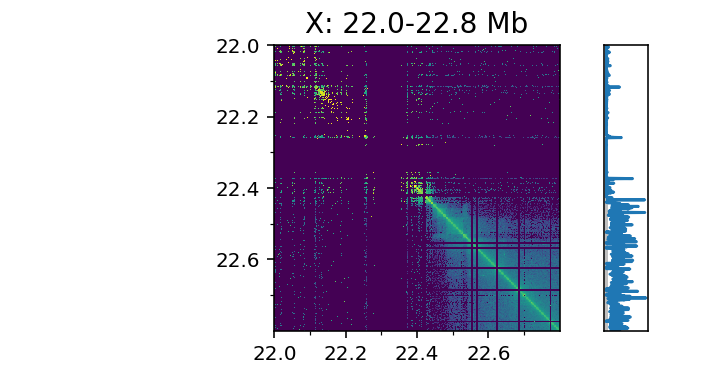

In [88]:
#3L 11.2
reload(hc)
hc.viewer(data_folder, tracks_folder, saves_folder)

In [90]:
os.listdir

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('2R-1659…

<IPython.core.display.Javascript object>


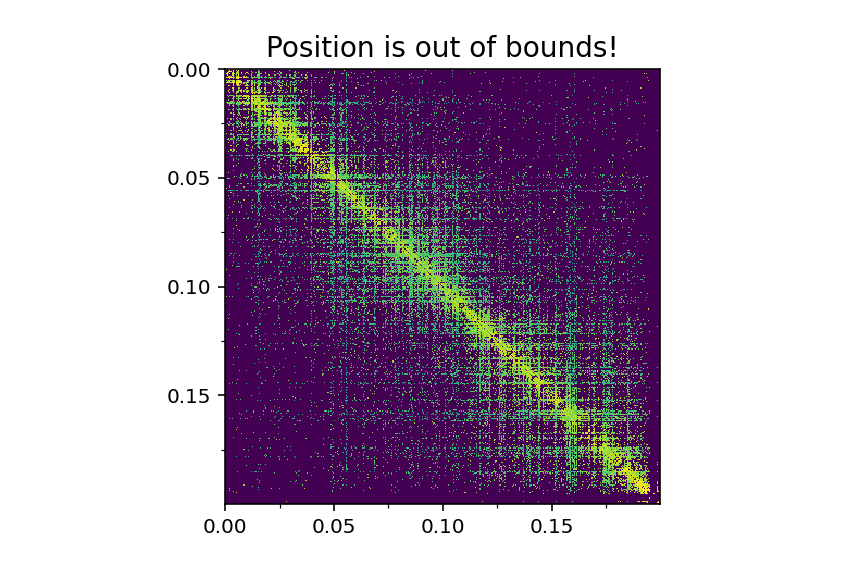

/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/2R-16591406-16783164_0_800000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/2R-16591406-16783164_0_400000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/3R-13867990-14286931_200000_600000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/3R-18393880-18587979_0_400000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/3L-20806833-21034356_0_400000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched/3L-20806833-21034356_0_800000_2000.txt


In [95]:
hc.viewer('/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-63-dm6-matched', track_folder=tracks_folder,save_folder=saves_folder, genometracks=False)

Looking with 4000 bp resolution at these longer-range interactions by inactive regions.

- 2L:10-10.8 is a remarkable area. You've got a stretch of a whole bunch of transcribed genes (H3K36) that forms a ton of itty bitty domains and those domains clearly form one big domain.

- 3L: 14.4-16.0 (4000) also interesting. Why do the long-range interactions skip so far? Seem to be low H4k8Ac regions.

- Long range carpet effect:
    - 3L: 14.4 (4000)
    - 3L: 8.8 (4000)
- 3L: 10.1: interesting case where there's a bunch of DNase-negative domains that seem like they should all contact, but there's a divide and (a super-boundary?). Nothing really at the domain except a looped domain. No transcription, no DNase. 

- 3L 12.8 we have a number of inactive DNase-poor domains skipped and instead more specific long-range contacts. There are polycomb peaks in this area but they don't readily explain anything.

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('2L', '2…

<IPython.core.display.Javascript object>


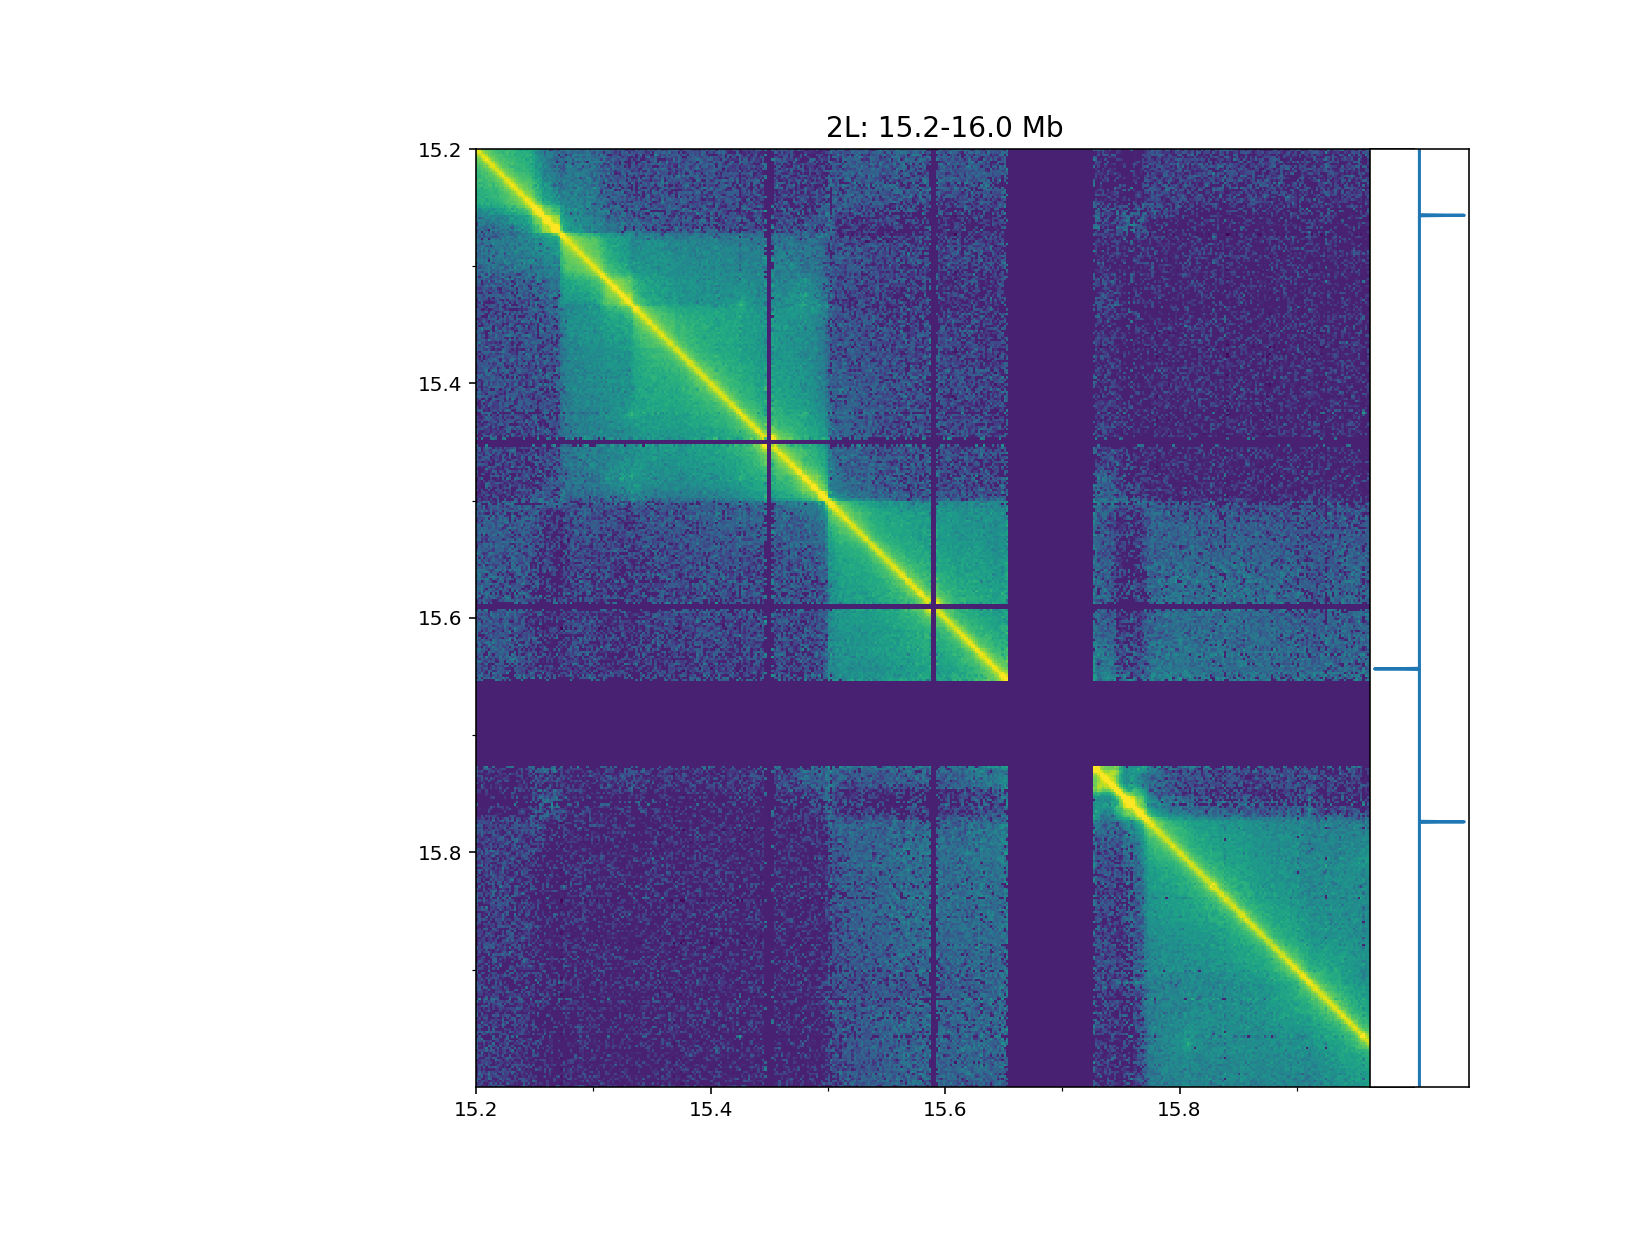

In [123]:
reload(hc)
hc.viewer(data_folder, tracks_folder, saves_folder)

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('2L-1051…

<IPython.core.display.Javascript object>


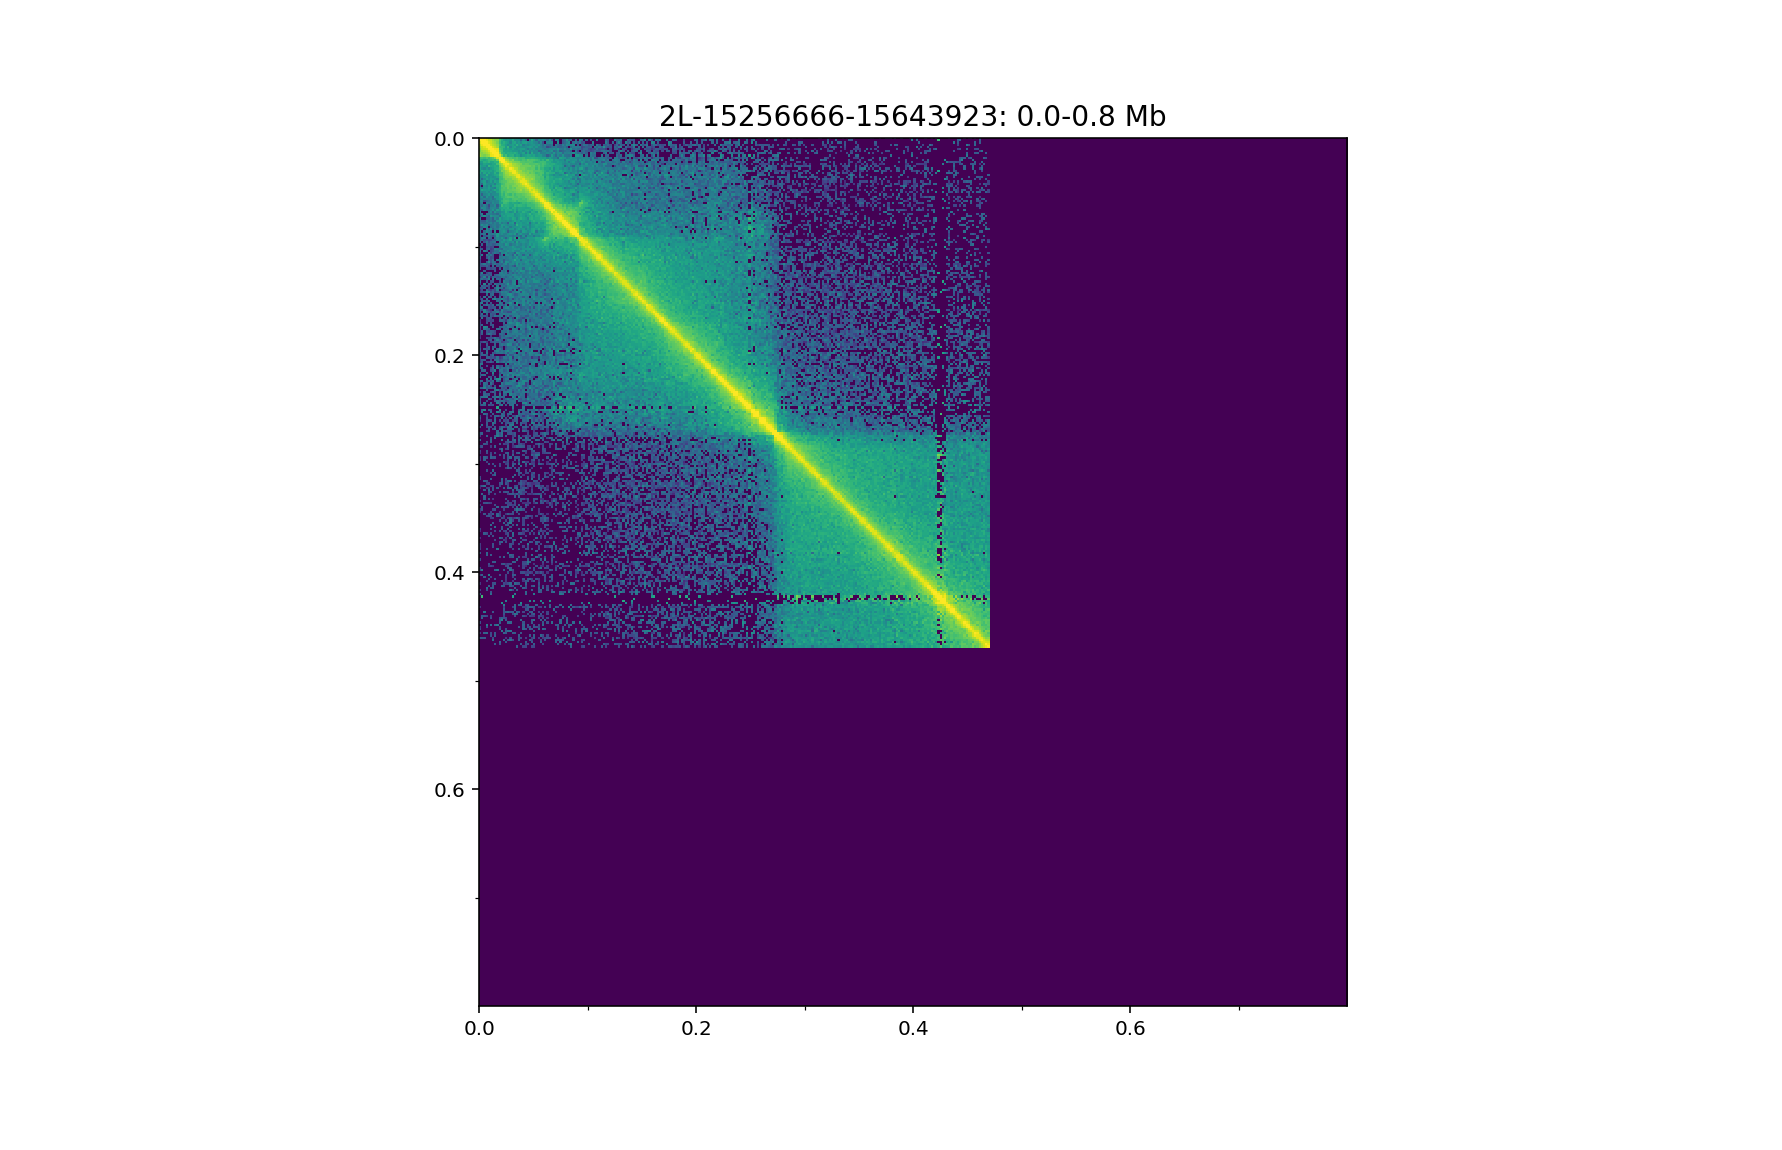

In [122]:
reload(hc)
hc.viewer('/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/virilis-hic-56-57-58-59-64_run12-dm6match', track_folder=tracks_folder,save_folder=saves_folder, genometracks=False)

## Visual inspection

Going through each virilis position and comparing to mel. Notes on interesting things/changes. Going by chromosome this time:

2L:
14.7: there are some 5' boundaries that seem either misplaced or new.
15.2: really well-conserved region (possible example)


Notes on syntenic block comparisons:

Using 1000/2000 resolution. Using lost/gained as if mel ancestral but that isn't implying anything just convenient phrasing.

- 3L 13.026: a looped domain in mel has been split into two unlooped domains.
- chromosome 4 doesn't look similar at all.
- 3R:31.7 boundary lost in virilis.
- X:20.5 boundary gained in virilis
- 3L:26.1 another conversion between loops and boundary (loops in virilis, boundary in mel)

In [119]:

l.sort()
print(l)

['2L-3245-2344', '3L:-2346-3456', '2L-3934-456923']
['2L-3245-2344', '2L-3934-456923', '3L:-2346-3456']


In [120]:
?l.sort

In [118]:
l

['2L-3245-2344', '2L-3934-456923', '3:-2346-3456']